In [ ]:
# ==========================================
# churn_data Model training
# ==========================================
# - 離反顧客分析用のモデリング
# ------------------------------------------
# Author : kokoyugura
# Date   : 2025-11
# Env    : Python 3.10+, openpyxl, pandas
# ==========================================

In [3]:
# === ライブラリ ===
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# === データ読み込み ===
ROOT = Path.cwd()
df = pd.read_csv(ROOT / "data" / "features.csv")

# === 特徴量と目的変数 ===
features = ["Recency", "Frequency", "Monetary", "AvgInterval", "Last3MonthsPurchases"]
target = "ChurnFlag"

X = df[features]
y = df[target]

In [6]:
# === データ分割 ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === スケーリング（ランダムフォレストは不要だけど精度確認用） ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

✅ Accuracy: 1.000
✅ ROC-AUC: 1.000
混同行列:
[[3363    0]
 [   0  637]]


C:\Users\7102581\AppData\Local\Temp\ipykernel_23800\161237957.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


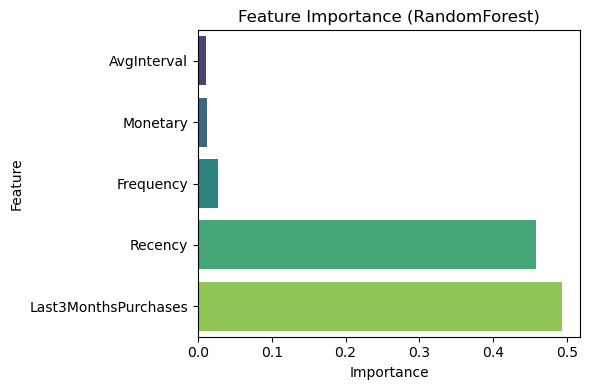

In [7]:
# === モデル構築 ===
model = RandomForestClassifier(
    n_estimators=300, 
    max_depth=6, 
    random_state=42, 
    class_weight="balanced"
)
model.fit(X_train_scaled, y_train)

# === 予測 ===
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# === 評価指標 ===
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"✅ Accuracy: {acc:.3f}")
print(f"✅ ROC-AUC: {auc:.3f}")
print("混同行列:")
print(confusion_matrix(y_test, y_pred))

# === 特徴量重要度 ===
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=True)

# === 可視化 ===
plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance (RandomForest)")
plt.tight_layout()
plt.show()